# Regular Genomics Project **RNA Localisation**


In [1]:
from plotting import plot_line_graph, multiplot_pearson
from metrics import Pearson
from models import CNN
from utils import prepare_data, set_variables
from keras.callbacks import EarlyStopping

### **1.** Data Preparation

Firstly, we import several necessary packages and load in our data:

In [2]:
train_data, valid_data, test_data = prepare_data()

### **2** |  Initializations

We use as baseline model the [RNATracker](https://github.com/HarveyYan/RNATracker/blob/master/Models/cnn_bilstm_attention.py) model and a CNN model.


In [3]:
max_seq_len = train_data['seq'].apply(lambda x: len(x)).max()
model_name = 'flor_CNN_Att0'
model_architecture_path, model_output_path, params_dataLoader_train, params_dataLoader_valid, params_model, params_train = set_variables(model_name, max_seq_len)

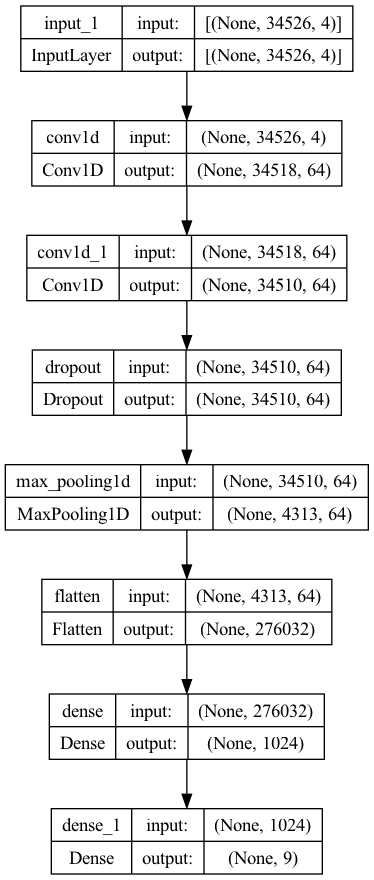

In [4]:
model = CNN(input_size=(max_seq_len, 4),
            params_model=params_model,
            metrics=[Pearson(return_dict=True)]
            )

model.print_model()
# model.summary() #if information about number of params needed

In [5]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 34526, 4)]        0         
                                                                 
 conv1d (Conv1D)             (None, 34518, 64)         2304      
                                                                 
 conv1d_1 (Conv1D)           (None, 34510, 64)         36864     
                                                                 
 dropout (Dropout)           (None, 34510, 64)         0         
                                                                 
 max_pooling1d (MaxPooling1  (None, 4313, 64)          0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 276032)            0         
                                                             

In [6]:
history = model.fit_and_evaluate(train_data=train_data, eval_data=valid_data,
                                 params_train_dataLoader=params_dataLoader_train,
                                 params_eval_dataLoader=params_dataLoader_valid,
                                 params_train=params_train,
                                 callback=[EarlyStopping(monitor='loss', patience=3)])

Epoch 1/100
311/311 [==============================] - 6954s 22s/step - loss: 2.3297 - ERM: 0.2629 - KDEL: 0.2865 - LMA: 0.0565 - MITO: 0.1538 - NES: 0.0904 - NIK: 0.0964 - NLS: 0.0812 - NUCP: 0.1297 - OMM: 0.0857 - val_loss: 2.1699 - val_ERM: 0.0525 - val_KDEL: 0.1906 - val_LMA: 0.1365 - val_MITO: 0.1539 - val_NES: 0.2065 - val_NIK: 0.3581 - val_NLS: -0.1630 - val_NUCP: 0.2459 - val_OMM: -0.1942
Epoch 2/100
311/311 [==============================] - 8776s 28s/step - loss: 2.1644 - ERM: 0.3508 - KDEL: 0.3597 - LMA: 0.1368 - MITO: 0.1933 - NES: 0.1806 - NIK: 0.2041 - NLS: 0.1614 - NUCP: 0.2226 - OMM: 0.1369 - val_loss: 2.1658 - val_ERM: 0.1330 - val_KDEL: 0.3066 - val_LMA: 0.1898 - val_MITO: 0.1761 - val_NES: 0.2192 - val_NIK: 0.2097 - val_NLS: 0.0040 - val_NUCP: 0.1405 - val_OMM: -0.1262
Epoch 3/100
311/311 [==============================] - 8678s 28s/step - loss: 2.1551 - ERM: 0.4283 - KDEL: 0.4022 - LMA: 0.2662 - MITO: 0.2527 - NES: 0.2998 - NIK: 0.3268 - NLS: 0.2525 - NUCP: 0.3025 -

KeyboardInterrupt: 

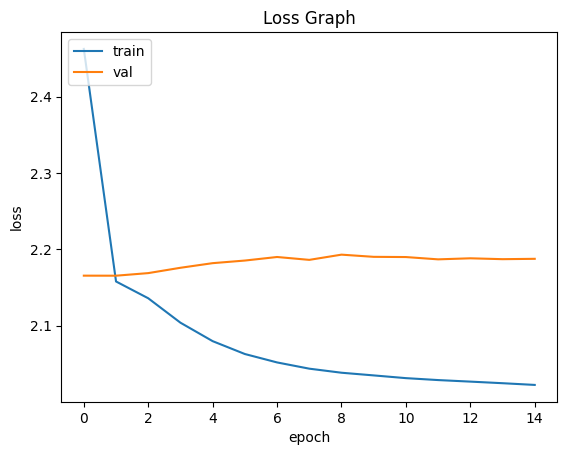

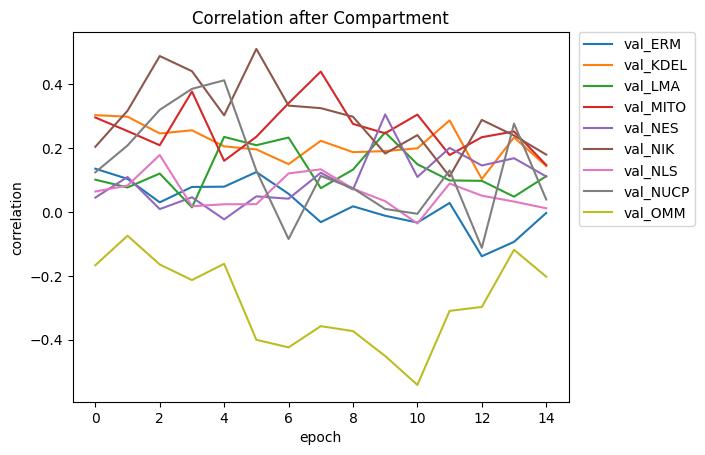

In [ ]:
import matplotlib.pyplot as plt
plt_data = [history.history['loss'], history.history['val_loss']]
plot_line_graph(plt_data, "Loss Graph", 'loss', 'epoch', ['train', 'val'])

multiplot_pearson(history.history)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

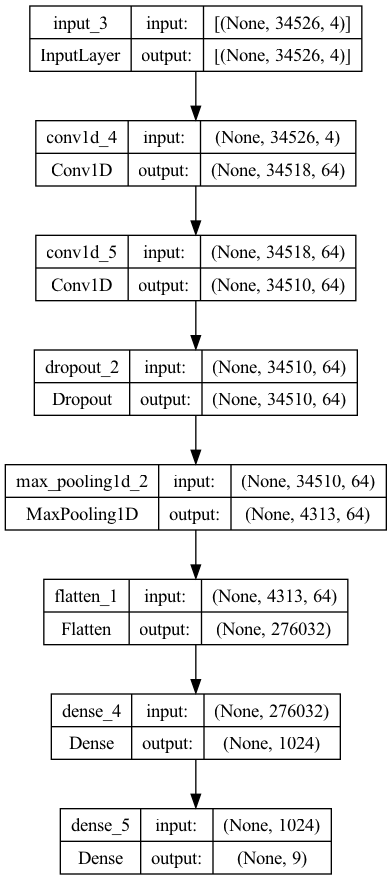

In [ ]:
model.print_model(model_architecture_path)
#model.save_model(model_output_path)